## Nischal Pradyoth 
## CS20B1109

Questions 

1) How many books do not have an original title [books.csv]?

2) How many unique books are present in the dataset ? Evaluate based on the 'book_id' after removing records containing null values for original_title column in [books.csv] and corresponding records in [book_tags.csv] and [ratings.csv]

3) How many unique users are present in the dataset [ratings.csv] ?

4) How many unique tags are there in the dataset [book_tags.csv] ?

5) Which tag_id  is the most frequently used ie. mapped with the highest number of books [book_tags.csv]  ? 
(In case of more than one tag, mention the tag id with the least numerical value)’.

6) Which book (title) has the most number of counts of tags given by the user [book_tags.csv,books.csv] .

7) Plot a bar chart with top 20 unique tags in descending order of ‘user records’ (the number of users tagged the given tag_id with the goodreads_book_id) [book_tags.csv]

In [15]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [16]:
books=pd.read_csv("books.csv")
book_tags=pd.read_csv("book_tags.csv")
ratings=pd.read_csv("ratings.csv")

1) How many books do not have an original title [books.csv]?

In [17]:
books.columns
books['original_title'].isnull().sum()

36

2) How many unique books are present in the dataset ? Evaluate based on the 'book_id' after removing records containing null values for original_title column in [books.csv] and corresponding records in [book_tags.csv] and [ratings.csv]

In [18]:
goodReadIds=books[books['original_title'].isnull()].goodreads_book_id
booksIds=books[books['original_title'].isnull()].book_id
books.dropna(subset=['original_title'],inplace=True)
book_tags=book_tags[~book_tags['goodreads_book_id'].isin(goodReadIds)]
ratings=ratings[~ratings['book_id'].isin(booksIds)]
books['book_id'].nunique()

363

3) How many unique users are present in the dataset [ratings.csv] ?

In [19]:
ratings.columns
len(ratings['user_id'].unique())

40573

4) How many unique tags are there in the dataset [book_tags.csv] ?

In [20]:
len(book_tags['tag_id'].unique())

3459

5) Which tag_id  is the most frequently used ie. mapped with the highest number of books [book_tags.csv]  ? 
(In case of more than one tag, mention the tag id with the least numerical value)’.

In [21]:
tag_counts = book_tags.groupby('tag_id')['goodreads_book_id'].nunique()
# print("\nTag Counts:")
# print(tag_counts)

most_frequent_tag_id = tag_counts.idxmax()
# print(f"\nThe most frequently used tag_id is initially: {most_frequent_tag_id}")

# if tag_counts[most_frequent_tag_id] > 1:
#     most_frequent_tag_id = tag_counts[tag_counts == tag_counts.max()].index.min()
#     print(f"After considering ties, the tag_id is: {most_frequent_tag_id}")

print(f"\nThe final most frequently used tag_id is: {most_frequent_tag_id}")



The final most frequently used tag_id is: 4600


6) Which book (title) has the most number of counts of tags given by the user [book_tags.csv,books.csv] .


In [22]:
df = pd.merge(book_tags, books, left_on='goodreads_book_id', right_on='goodreads_book_id')
most_tags_count = df.groupby('title')['tag_id'].count().idxmax()
print(f"Book with the most number of counts of tags: {most_tags_count}")

Book with the most number of counts of tags: 'Tis (Frank McCourt, #2)


7) Plot a bar chart with top 20 unique tags in descending order of ‘user records’ (the number of users tagged the given tag_id with the goodreads_book_id) [book_tags.csv]

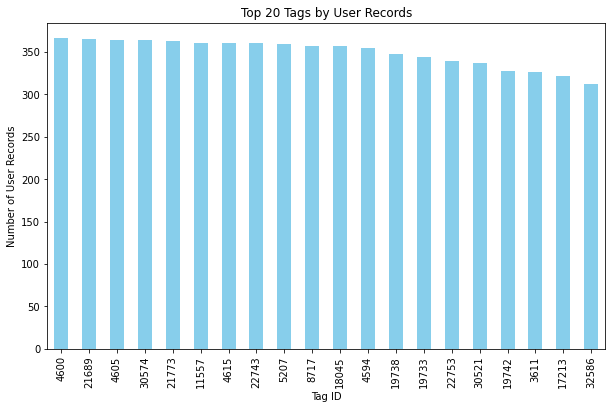

In [23]:
top_tags = book_tags.groupby('tag_id')['goodreads_book_id'].nunique().sort_values(ascending=False).head(20)
top_tags.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Top 20 Tags by User Records')
plt.xlabel('Tag ID')
plt.ylabel('Number of User Records')
plt.show()